<a href="https://colab.research.google.com/github/cloudhood/learning-basics/blob/main/notebooks/tsa_interpolation_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

In [2]:
plt.rcParams["figure.figsize"] = (15, 7)

In [3]:
dat = """
Time           Sales
2021-06-30      0.00
2021-07-31     64.40
2021-08-31     82.61
2021-09-30     93.37
2021-10-31     97.74
2021-11-30     98.56
2021-12-31    103.01
2022-01-31    104.97
2022-02-28    108.55
2022-03-31    115.36
2022-04-30    123.87
2022-05-31    122.36
2023-05-31    978.88
"""

In [4]:
## Read in data into a new dataframe.
df1 = pd.read_csv(StringIO(dat), sep="\s+").astype({"Time": "datetime64[ns]"})

In [5]:
## Create empty data frame containing missing month end dates.
df2 = pd.DataFrame(
    {"Time": pd.date_range(start="2022-06-30", end="2023-04-30", freq="M")}
).assign(Sales=np.nan)

In [6]:
## Combine and derive five examples of imputing missing values.
df3 = (
    pd.concat([df1, df2])
    .set_index("Time")
    .sort_index()
    .assign(
        naive=lambda _: _.Sales.ffill(),
        linear=lambda _: _.Sales.interpolate(method="linear"),
        quadratic=lambda _: _.Sales.interpolate(method="quadratic"),
        cubic=lambda _: _.Sales.interpolate(method="cubic"),
        spline=lambda _: _.Sales.interpolate(method="spline", order=4),
    )
)

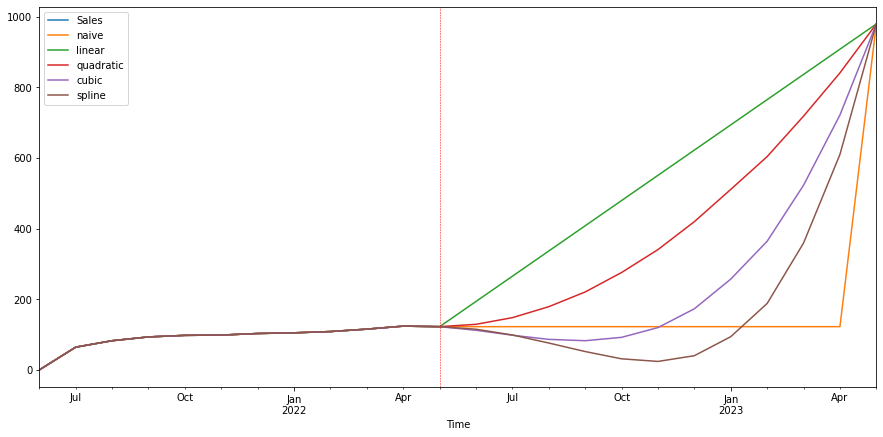

In [7]:
df3.plot()
plt.axvline(x="2022-05-31", color="red", linewidth=0.5, linestyle="--")
plt.show()